In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import csv
import joblib
import re
import string
import unicodedata
import nltk
#nltk.download("punkt")
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.util import ngrams
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# code_preparation

In [2]:
df0 = pd.read_csv("C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/raw/SMSSpamCollection.csv", sep='\t',names=["message"], 
                  encoding='ISO-8859-1',index_col=False)
df0.head()

,message
0,"ham,Go until jurong point, crazy.. Available o..."
1,"ham,Ok lar... Joking wif u oni..."
2,"spam,Free entry in 2 a wkly comp to win FA Cup..."
3,"ham,U dun say so early hor... U c already then..."
4,"ham,Nah I don't think he goes to usf, he lives..."


In [3]:
df0[['label', 'text']] = df0['message'].str.split(',', 1, expand=True)
df0.head()

,message,label,text
0,"ham,Go until jurong point, crazy.. Available o...",ham,"Go until jurong point, crazy.. Available only ..."
1,"ham,Ok lar... Joking wif u oni...",ham,Ok lar... Joking wif u oni...
2,"spam,Free entry in 2 a wkly comp to win FA Cup...",spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,"ham,U dun say so early hor... U c already then...",ham,U dun say so early hor... U c already then say...
4,"ham,Nah I don't think he goes to usf, he lives...",ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
del df0['message']
df0.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df = df0.to_csv("C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/SMSSpamColl.csv", index=False)

In [6]:
df = pd.read_csv("C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/SMSSpamColl.csv", encoding='utf-8')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df = df[['text','label']]
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [8]:
df.shape

(5574, 2)

In [9]:
df['text'].isna().sum()

0

In [10]:
df['label'].isna().sum()

0

In [11]:
#labeling
reviews = np.array(df['text'])[:]
labels = np.array(df['label'])[:]
Counter(labels)

Counter({'ham': 4827, 'spam': 747})

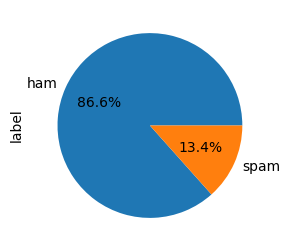

In [12]:
label_count = df['label'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.savefig("../spam_filter/docs/images/label_count_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

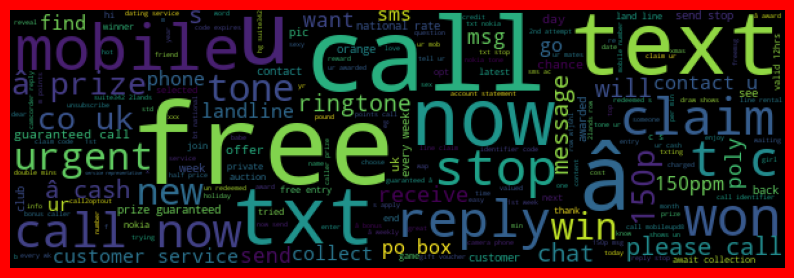

In [13]:
# Plotting the word cloud of spam words

spam_words = ""

# Loop all texts where label is 'spam'
for value in df[df['label'] == 'spam'].text:
    lowercase_text = value.lower()
    tokens = nltk.word_tokenize(lowercase_text)
    for word in tokens:
        spam_words = spam_words + word + ' '

spam_wordcloud = WordCloud(background_color="Black", width=600, height=200).generate(spam_words)

# Plot the word cloud 
plt.figure( figsize=(10,10), facecolor='r')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.savefig('../spam_filter/docs/images/spam_wordcloud.jpeg',
            transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

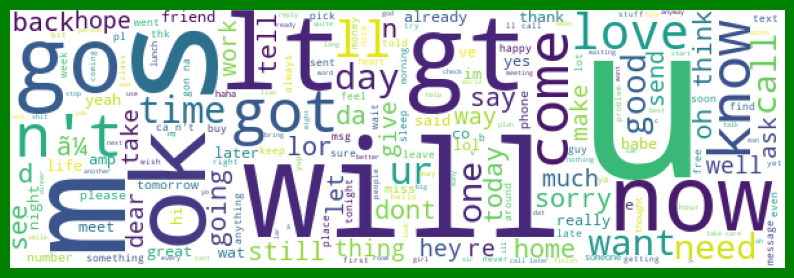

In [14]:
# Plotting the word cloud of NOT spam words

ham_words = ""

# Loop all texts where label is 'ham'
for value in df[df['label'] == 'ham'].text:
    lowercase_text = value.lower()
    tokens = nltk.word_tokenize(lowercase_text)
    for word in tokens:
        ham_words = ham_words + word + ' '

ham_wordcloud = WordCloud(background_color="White", width=600, height=200).generate(ham_words)

# Plot the word cloud 
plt.figure( figsize=(10,10), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.savefig('../spam_filter/docs/images/ham_wordcloud.jpeg',
            transparent=False, bbox_inches='tight',pad_inches=0.1)
plt.show()

# Split the dataset into training and testing datasets

In [27]:
x_train, x_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.3, stratify=labels, shuffle=True)

# Save the training and testing datasets to csv files
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
train_df.to_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/train.csv', index=False)

test_df = pd.DataFrame({'text': x_test, 'label': y_test})
test_df.to_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/test.csv', index=False)

In [28]:
train_df.shape

(3901, 2)

In [29]:
train_df.head()

,text,label
0,hanks lotsly!,ham
1,"Hey, I missed you tm of last night as my phone...",ham
2,You should know now. So how's anthony. Are you...,ham
3,Wat u doing there?,ham
4,"Sorry, I'll call later",ham


In [30]:
test_df.shape

(1673, 2)

# Repeat minor datasets on train_df

In [31]:
train_df = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/train.csv', encoding='utf-8')

# Repeat the minor dataset
spam_df = train_df[train_df['label'] == 'spam']
repeated_spam_df = pd.concat([spam_df] * 6, ignore_index=True)

# Concatenate the original DataFrame with the repeated minor datasets
train_df = pd.concat([train_df, repeated_spam_df], ignore_index=True)

# Check the result
print(Counter(train_df['label']))

Counter({'spam': 3661, 'ham': 3378})


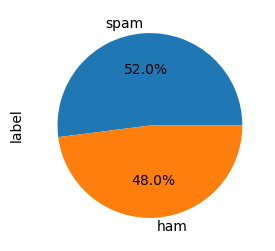

In [32]:
label_count = train_df['label'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)
plt.savefig("../spam_filter/docs/images/train_label_count_chart.jpeg",
            transparent=False, bbox_inches='tight',pad_inches=0.1)

In [33]:
# Save the DataFrame to a CSV file
train_df.to_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/training.csv', 
                index=False, encoding='utf-8')

# Triple repeated train dataset

In [34]:
df0 = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/training.csv', encoding='utf-8')
df0.shape

(7039, 2)

In [35]:
# Concatenate the original DataFrame with itself
train_df = pd.concat([df0, df0, df0], ignore_index=True)
print(Counter(train_df['label']))

Counter({'spam': 10983, 'ham': 10134})


In [36]:
train_df.to_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/train.csv', 
           index=False, encoding='utf-8')

# Repeat minor datasets on test_df

In [37]:
test_df = pd.read_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/test.csv', encoding='utf-8')

# Repeat the minor dataset
spam_df = test_df[test_df['label'] == 'spam']
repeated_spam_df = pd.concat([spam_df] * 6, ignore_index=True)

# Concatenate the original DataFrame with the repeated minor datasets
test_df = pd.concat([test_df, repeated_spam_df], ignore_index=True)

# Check the result
print(Counter(test_df['label']))

Counter({'spam': 1568, 'ham': 1449})


In [38]:
test_df.shape

(3017, 2)

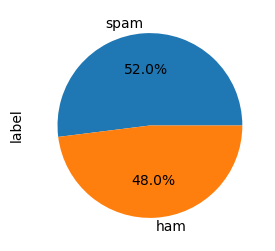

In [39]:
import matplotlib.pyplot as plt
label_count = test_df['label'].value_counts()
plot_users=label_count.plot.pie(autopct='%1.1f%%', figsize=(3, 3))
plt.rc('axes', unicode_minus=False)

In [40]:
test_df.to_csv('C:/Users/Asus/PYTHON_C/DLBDSME01/spam_filter/data/processed/test.csv', 
           index=False, encoding='utf-8')

# code_model_selection

## Cleaning

In [41]:
def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase

    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]
    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    
    return tokens    

## Vectorizer tf-idf

In [ ]:
# cv=TfidfVectorizer(lowercase=True,preprocessor=clean_text,stop_words='english',
#                    ngram_range=(1,3),tokenizer=tokenize)

# text_counts=cv.fit_transform(df['text'].values.astype('U'))

In [51]:
# Define the vectorizer and fit it to the training data
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=clean_text, stop_words='english',
                             ngram_range=(1,3), tokenizer=tokenize)

x_train = vectorizer.fit_transform(train_df['text'].values.astype('U'))
y_train = train_df['label']

## Split into training and testing data

In [52]:
# x_train,x_test,y_train,y_test =train_test_split(text_counts, df['label'],stratify=df['label'],random_state=42,test_size=0.3)


In [53]:
# Vectorize the test data using the same vectorizer
x_test = vectorizer.transform(test_df['text'].values.astype('U'))
y_test = test_df['label']

# Evaluate Models:

Classification report
Model with high accuracy but low precision might be overfitting.

Model with a low accuracy but high precision might be underfitting.

Model with a high f1-score means have a good balance between accuracy and recall, have better overall performance.

The confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the model. The confusion matrix shows the number of times the model correctly (true positive and true negative) and incorrectly (false positive and false negative) predicted each class.

In [44]:
def performance_evaluation():

#def Classification_report():
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
#def conf_matrix_img():    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("")
    #Normalized Confusion Matrix
    nconf_matrix = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis],1)
    print(nconf_matrix)    

#def heatmap_image():    
    le = LabelEncoder()
    le.fit(labels)
    class_labels = le.classes_
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=class_labels, yticklabels=class_labels, ax=ax1)
    ax1.set_xlabel("Predicted labels")
    ax1.set_ylabel("True labels")
    ax1.set_title("Confusion Matrix")
    sns.heatmap(nconf_matrix, annot=True, cmap=plt.cm.Greens, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, ax=ax2)
    ax2.set_xlabel("Predicted labels")
    ax2.set_ylabel("True labels")
    ax2.set_title("Normalized")
    # Add some space between the subplots
    plt.subplots_adjust(wspace=1)

    # Set the aspect ratio to "equal"
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")

    # Save the chart to a file
    #plt.savefig('../spam_filter/docs/images/combined_heatmaps.jpeg',transparent=False,
    #bbox_inches='tight', pad_inches=0.1)
    plt.show()

## Logistic regression Classifier

In [45]:
# Logistic Regression
clf = LogisticRegression(C=0.2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9632084852502486

## Logistic regression + L1 Regulation

In [46]:
# Logistic Regression
clf = LogisticRegression(penalty='l1', solver = 'saga', C=0.2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
print("Accuracy with L1 regularization: ", metrics.accuracy_score(y_test, y_pred))

Accuracy with L1 regularization:  0.9360291680477295


## Logistic regression + L1 Regulation + Cross Validation

In [47]:
clf = LogisticRegression(penalty='l1', solver = 'saga', C=0.2)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L1 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.95208333 0.95226369 0.95093768 0.95074825]
Average Cross Validation Score:  0.9515082362505526
Accuracy with L1 regularization and cross validation:  0.9360291680477295


## Logistic regression + L2 Regulation

In [48]:
clf = LogisticRegression(penalty='l2', solver = 'lbfgs', C=0.3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
print("Accuracy with L2 regularization: ", metrics.accuracy_score(y_test, y_pred))

Accuracy with L2 regularization:  0.9632084852502486


## Logistic regression + L2 Regulation + Cross Validation

In [49]:
clf = LogisticRegression(penalty='l2', solver = 'lbfgs', C=0.3)
scores = cross_val_score(clf, x_train, y_train, cv=6)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L2 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.99914773 1.         0.99914773 1.         0.99914749 1.        ]
Average Cross Validation Score:  0.9995738232710739
Accuracy with L2 regularization and cross validation:  0.9632084852502486


In [55]:
#SAVE MODEL

def train_models():
    file = open('../spam_filter/src/code_model_deploy/vectorizer.pkl','wb')
    joblib.dump(vectorizer, file)
    file.close()

    file = open('../spam_filter/src/code_model_deploy/model.pkl','wb')
    joblib.dump(clf, file)
    file.close()
    
    print("Models saved")
    
train_models()

Models saved


In [57]:
#LOAD MODEL

def load_models():  
       
    # Load the vectorizer.
    file = open('../spam_filter/src/code_model_deploy/vectorizer.pkl', 'rb')
    vectorizer = joblib.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('../spam_filter/src/code_model_deploy/model.pkl', 'rb')
    model = joblib.load(file)
    file.close()
    
    return vectorizer, model

vectorizer, model = load_models()

# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print(prediction)

Enter your message:You are awarded lucky prize cash money
['spam']


              precision    recall  f1-score   support

         ham       0.94      0.99      0.96      1449
        spam       0.99      0.94      0.96      1568

    accuracy                           0.96      3017
   macro avg       0.96      0.96      0.96      3017
weighted avg       0.96      0.96      0.96      3017

[[1436   13]
 [  98 1470]]

[[1.  0. ]
 [0.1 0.9]]


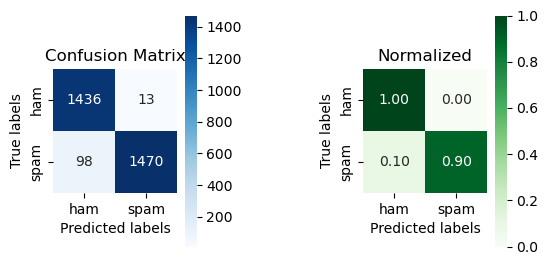

In [58]:
performance_evaluation()

## Bernoulli NB Classifier

In [59]:
#Ber_NB
clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9071925754060325

## Bernoulli NB + Cross validation

In [60]:
#Ber_NB with cross validation
clf = BernoulliNB()
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy with cross validation: ", scores.mean())

Accuracy with cross validation:  0.9950277027317934


In [61]:
#SAVE MODEL
train_models()

Models saved


In [62]:
# LOAD MODEL
vectorizer, model = load_models()
model.fit(x_train, y_train)

# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print(prediction)

Enter your message:You are awarded lucky prize cash money
['ham']


              precision    recall  f1-score   support

         ham       0.84      1.00      0.91      1449
        spam       1.00      0.82      0.90      1568

    accuracy                           0.91      3017
   macro avg       0.92      0.91      0.91      3017
weighted avg       0.92      0.91      0.91      3017

[[1449    0]
 [ 280 1288]]

[[1.  0. ]
 [0.2 0.8]]


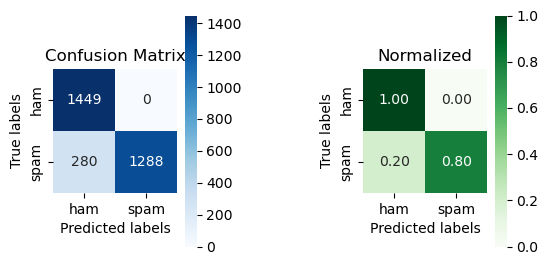

In [63]:
performance_evaluation()

## Linear SVC Classifier

In [67]:
#Linear SVC
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9516075571760026

## Linear SVC + L1 Regulation + Cross Validation

In [68]:
clf = svm.LinearSVC(penalty='l1', loss='squared_hinge', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L1 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.99564394 0.99659026 0.99640083 0.99677969]
Average Cross Validation Score:  0.9963536823290683
Accuracy with L1 regularization and cross validation:  0.9496188266489891


## Linear SVC + L2 Regulation + Cross Validation

In [69]:
clf = svm.LinearSVC(penalty='l2', C=0.3, dual=False)
scores = cross_val_score(clf, x_train, y_train, cv=4)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L2 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.99962121 0.99962114 1.         0.99962114]
Average Cross Validation Score:  0.99971587321405
Accuracy with L2 regularization and cross validation:  0.9565793834935367


In [70]:
#SAVE MODEL
train_models()

Models saved


In [71]:
#LOAD MODEL
vectorizer, model = load_models()

# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print(prediction)

Enter your message:You are awarded lucky prize cash money
['spam']


              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1449
        spam       1.00      0.92      0.96      1568

    accuracy                           0.96      3017
   macro avg       0.96      0.96      0.96      3017
weighted avg       0.96      0.96      0.96      3017

[[1444    5]
 [ 126 1442]]

[[1.  0. ]
 [0.1 0.9]]


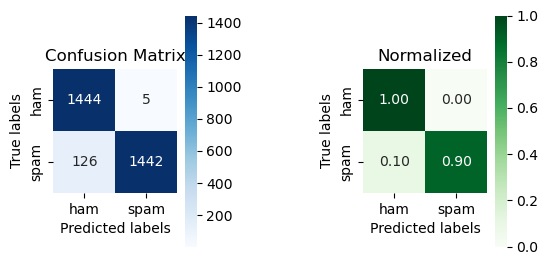

In [72]:
performance_evaluation()

## Support Vector Machines Classifier

In [73]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9516075571760026

## Support Vector Machines + Cross validation

In [77]:
clf = SVC(kernel='linear')
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Accuracy of SVM with cross validation: ", scores.mean())

Accuracy of SVM with cross validation:  1.0


In [78]:
#SAVE MODEL  
train_models()

Models saved


In [79]:
# LOAD MODEL
vectorizer, model = load_models()
model.fit(x_train, y_train)
# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print(prediction)

Enter your message:You are awarded lucky prize cash money
['spam']


              precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1449
        spam       1.00      0.91      0.95      1568

    accuracy                           0.95      3017
   macro avg       0.95      0.95      0.95      3017
weighted avg       0.96      0.95      0.95      3017

[[1443    6]
 [ 140 1428]]

[[1.  0. ]
 [0.1 0.9]]


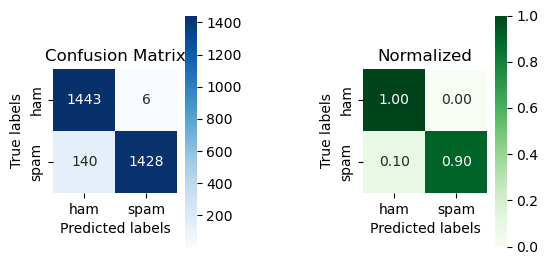

In [80]:
performance_evaluation()

### This model has good performance. 

## Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8677494199535963

## Decision Tree Classifier + Cross validation

In [82]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x_train, y_train, cv = 10)
print("Accuracy of Decision Tree with Cross Validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Decision Tree with Cross Validation: 1.00 (+/- 0.00)


In [83]:
#SAVE MODEL  
train_models()

Models saved


In [84]:
# LOAD MODEL
vectorizer, model = load_models()
model.fit(x_train, y_train)
# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print(prediction)

Enter your message:You are awarded lucky prize cash money
['spam']


              precision    recall  f1-score   support

         ham       0.79      0.99      0.88      1449
        spam       0.99      0.75      0.86      1568

    accuracy                           0.87      3017
   macro avg       0.89      0.87      0.87      3017
weighted avg       0.89      0.87      0.87      3017

[[1435   14]
 [ 385 1183]]

[[1.  0. ]
 [0.2 0.8]]


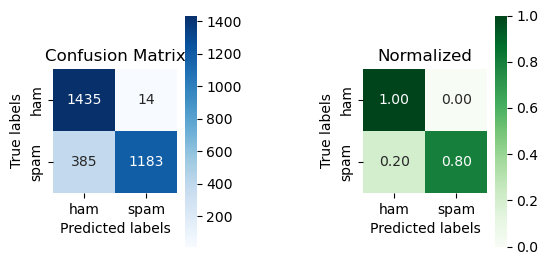

In [85]:
performance_evaluation()

### This model has good performance. The lowest number is 83% precision for spam

In [86]:
#XGBoost Classifier
#import xgboost as xgb
#from sklearn.preprocessing import LabelEncoder

#Encode the labels as integers
#le = LabelEncoder()
#y_train = le.fit_transform(y_train)
#y_test = le.transform(y_test)

#Fit the XGBoost classifier
#clf = xgb.XGBClassifier()
#clf.fit(x_train, y_train)
#y_pred = clf.predict(x_test)
#metrics.accuracy_score(y_test, y_pred)

## Multinomial Naive Bayes Classifier

In [87]:
#Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.959562479284057

## Multinomial Naive Bayes + Cross validation

In [88]:
clf = MultinomialNB(alpha=0.3)
scores = cross_val_score(clf, x_train, y_train, cv=7)
print("Accuracy of Multinomial Naive Bayes with cross validation: ", scores.mean())

Accuracy of Multinomial Naive Bayes with cross validation:  0.9974427938536498


## Save the chosen model and Vectorizer 

In [89]:
#SAVE MODEL
train_models()

Models saved


## Load model and Vectorizer

In [90]:
# LOAD MODEL
vectorizer, model = load_models()
model.fit(x_train, y_train)
# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print(prediction)

Enter your message:You are awarded lucky prize cash money
['spam']


              precision    recall  f1-score   support

         ham       0.94      0.98      0.96      1449
        spam       0.98      0.94      0.96      1568

    accuracy                           0.96      3017
   macro avg       0.96      0.96      0.96      3017
weighted avg       0.96      0.96      0.96      3017

[[1418   31]
 [  91 1477]]

[[1.  0. ]
 [0.1 0.9]]


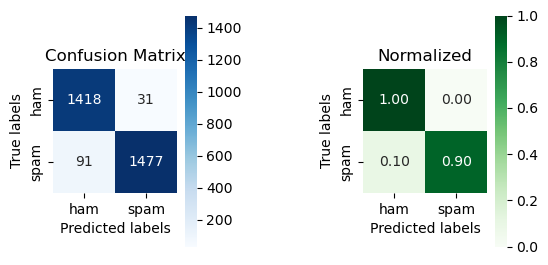

In [91]:
performance_evaluation()

### This is the best model so far with highest precision, recall, f1-score, accuracy for both ham and spam.
### The lowest number is 94% recall for spam 

# Deploy locally

In [ ]:
%%writefile spam_filter.py


import numpy as np
import pandas as pd
import csv
import joblib
import streamlit as st
import unicodedata
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import *
from sklearn.preprocessing import LabelEncoder

def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase

    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]
    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    
    return tokens    

def load_models():     
    # Load the vectorizer.
    file = open('../spam_filter/src/code_model_deploy/vectorizer.pkl', 'rb')
    vectorizer = joblib.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('../spam_filter/src/code_model_deploy/model.pkl', 'rb')
    model = joblib.load(file)
    file.close()
    
    return vectorizer, model

df = pd.read_csv('../spam_filter/data/processed/SMSSpamColl.csv', encoding='utf-8')
cv=TfidfVectorizer(lowercase=True,preprocessor=clean_text,stop_words='english',ngram_range=(1,3),tokenizer=tokenize)
text_counts=cv.fit_transform(df['text'].values.astype('U'))
x_train, x_test, y_train, y_test = train_test_split(text_counts,df['label'],test_size=0.3)

def main():    
    st.title("Spam Classifier")
    st.write("Enter your message to check if it's spam or not.")
    user_input = st.text_input("Enter message here:")
    
    if st.button("Check"):                  
    # Make predictions
        vectorizer, model = load_models()
        model.fit(x_train, y_train) 
        clean_input = clean_text(user_input)
        input_counts = vectorizer.transform([clean_input])
        prediction = model.predict(input_counts)[0]
        st.write("Prediction: ", prediction)

if __name__ == '__main__':
    main()


# Deploy to the cloud

In [ ]:
%%writefile spam_classifier.py

import numpy as np
import pandas as pd
import csv
import joblib
import streamlit as st
import unicodedata
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import *
from sklearn.preprocessing import LabelEncoder

def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase

    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]
    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    
    return tokens    

def load_models():     
    # Load the vectorizer.
    file = open('vectorizer.pkl', 'rb')
    vectorizer = joblib.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('model.pkl', 'rb')
    model = joblib.load(file)
    file.close()
    
    return vectorizer, model

df = pd.read_csv('SMSSpamColl.csv', encoding='utf-8')
cv=TfidfVectorizer(lowercase=True,preprocessor=clean_text,stop_words='english',ngram_range=(1,3),tokenizer=tokenize)
text_counts=cv.fit_transform(df['text'].values.astype('U'))
x_train, x_test, y_train, y_test = train_test_split(text_counts,df['label'],test_size=0.3)

def main():    
    st.title("Spam Classifier")
    st.write("Enter your message to check if it's spam or not.")
    user_input = st.text_input("Enter message here:")
    
    if st.button("Check"):                  
    # Make predictions
        vectorizer, model = load_models()
        model.fit(x_train, y_train) 
        clean_input = clean_text(user_input)
        input_counts = vectorizer.transform([clean_input])
        prediction = model.predict(input_counts)[0]
        st.write("Prediction: ", prediction)

if __name__ == '__main__':
    main()

# Deploy locally, append user input as new row in dataset

In [ ]:
%%writefile spam_filter_.py

import numpy as np
import pandas as pd
import csv
import joblib
import streamlit as st
import unicodedata
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import *
from sklearn.preprocessing import LabelEncoder

def clean_text(text):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', 
                ' ', text)
    text=re.sub(r'['+punctuation+']',' ',text)
    text=re.sub(r'#(\w+)',' ',text)
    text=re.sub(r'@(\w+)',' ',text)
    text = text.lower() # Convert  to lowercase

    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]
    
    return ' '.join(stems)

def tokenize(text):
    token=RegexpTokenizer(r'\w+')
    tokens = token.tokenize(text)
    
    return tokens    

def load_models():     
    # Load the vectorizer.
    file = open('../spam_filter/src/code_model_deploy/vectorizer.pkl', 'rb')
    vectorizer = joblib.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('../spam_filter/src/code_model_deploy/model.pkl', 'rb')
    model = joblib.load(file)
    file.close()
    
    return vectorizer, model

df = pd.read_csv('../spam_filter/data/processed/SMSSpamColl.csv', encoding='utf-8')
cv=TfidfVectorizer(lowercase=True,preprocessor=clean_text,stop_words='english',ngram_range=(1,3),tokenizer=tokenize)
text_counts=cv.fit_transform(df['text'].values.astype('U'))
x_train, x_test, y_train, y_test = train_test_split(text_counts,df['label'],test_size=0.3)

def predict(user_input, vectorizer, model):
    # Make predictions
    clean_input = clean_text(user_input)
    input_counts = vectorizer.transform([clean_input])
    prediction = model.predict(input_counts)[0]
    return prediction

def main():
    st.title("Spam Classifier")
    st.write("Enter your message to check if it's spam or not.")
    user_input = st.text_input("Enter message here:")
    if st.button("Check"):
        # Load models
        vectorizer, model = load_models()
        model.fit(x_train, y_train)
        
        # Make prediction
        prediction = predict(user_input, vectorizer, model)
        st.write("Prediction: ", prediction)
        
        # Add prediction to dataframe and save to file
        df = pd.read_csv('SMSSpamColl.csv', sep='\t', names=['label', 'text'], encoding='utf-8')
        new_row = pd.DataFrame({'label': [prediction], 'text': [user_input]})
        df = pd.concat([df, new_row], ignore_index=True)
        df.to_csv('../spam_filter/data/processed/SMSSpamColl.csv',index=False, sep='\t', mode='a')
        st.write("New row added to file.")
        
if __name__ == '__main__':
    main()